In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('kc_house_data.csv')

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
df.drop(['id', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition', 'sqft_lot15'], axis=1, inplace=True)

# Notes on dropping columns in data_notes.txt

In [30]:
# Also going to skip zip and lats for now
df.drop(['zipcode', 'lat', 'long'], axis=1, inplace=True)

In [31]:
df.head()

,price,bathrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15
0,221900.0,1.00,1180,NaN,0.0,7,1180,0.0,1955,0.0,1340
1,538000.0,2.25,2570,0.0,0.0,7,2170,400.0,1951,1991.0,1690
2,180000.0,1.00,770,0.0,0.0,6,770,0.0,1933,NaN,2720
3,604000.0,3.00,1960,0.0,0.0,7,1050,910.0,1965,0.0,1360
4,510000.0,2.00,1680,0.0,0.0,8,1680,0.0,1987,0.0,1800


In [22]:
df.isna().sum()

price               0
bathrooms           0
sqft_living         0
waterfront       2376
view               63
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
dtype: int64

In [39]:
# Lets check if bathrooms should be polished
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

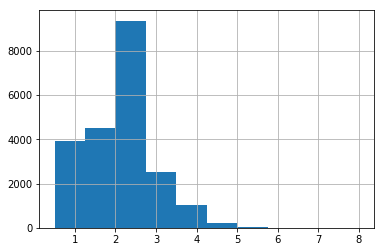

In [33]:
df.bathrooms.hist()
plt.show()

In [29]:
# Examine skew
print(
    f'median: {df.bathrooms.median()} \n'
    f'mean: {df.bathrooms.mean()}')

median: 2.25 
mean: 2.1158262721674306


In [32]:
# Not a lot of skew. Going to leave alone for now

In [42]:
# How about sqft_liv?
df.sqft_living.unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

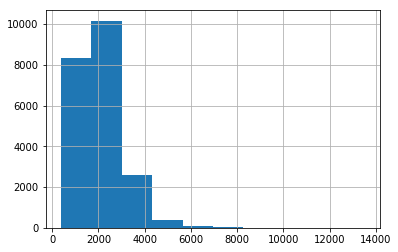

In [35]:
df.sqft_living.hist()
plt.show()

In [36]:
# Examine skew
print(
    f'median: {df.sqft_living.median()} \n'
    f'mean: {df.sqft_living.mean()}')

median: 1910.0 
mean: 2080.3218502569803


In [37]:
# Skew aprox 175 sqft.. also going to leave for now

In [47]:
# Lets look at waterfront and some missing values
print(f'missing: {df.waterfront.isna().sum()} from total rows: {len(df)}')

missing: 2376 from total rows: 21597


In [48]:
# Roughly 10% of this column is missing data.
# What is a more accurate depiction of the truth: excluding 10% or...
#     ,  presuming a missing val is NOT Waterfront?????

# For now going to presume they are not waterfront
df.waterfront.unique()

array([nan,  0.,  1.])

In [51]:
df.waterfront.fillna(value=0, inplace=True)

In [53]:
df.waterfront.isna().sum()

0

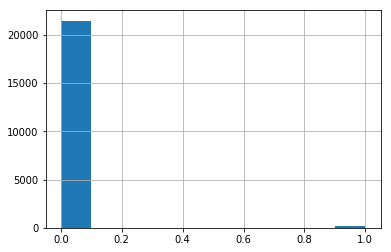

In [54]:
df.waterfront.hist()
plt.show()

In [20]:
(df.yr_renovated > 0).sum()

744

In [55]:
# Categorical binary bool

In [58]:
# What about missing views?
print(f'missing: {df.view.isna().sum()} from total rows: {len(df)}')

missing: 63 from total rows: 21597


In [69]:
# Less than a percent of data missing. Lets drop these rows.
df.drop(df[df.view.isna()].index, axis=0, inplace=True)

In [71]:
df.view.isna().sum(), len(df) # Check to see the rows are gone

(0, 21534)

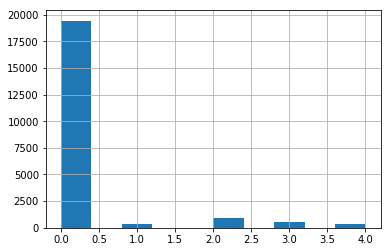

In [73]:
df['view'].hist()

In [74]:
# Categorical and not worried about skew

In [75]:
df.grade.value_counts()

7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

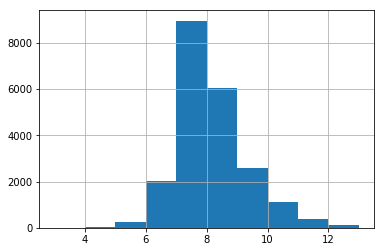

In [76]:
df.grade.hist()

In [80]:
# Seems well distributed

In [81]:
# What about sqft above?

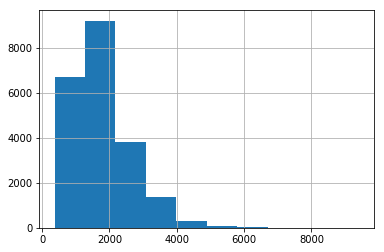

In [82]:
df.sqft_above.hist()
plt.show()

In [83]:
# Examine skew
print(
    f'median: {df.sqft_above.median()} \n'
    f'mean: {df.sqft_above.mean()}')

median: 1560.0 
mean: 1788.5575369183616


In [84]:
# More than 200 sqft deviation

In [86]:
df.corr().sqft_above

price            0.605695
bathrooms        0.686173
sqft_living      0.876553
waterfront       0.069931
view             0.166299
grade            0.755977
sqft_above       1.000000
yr_built         0.423999
yr_renovated     0.021654
sqft_living15    0.731543
Name: sqft_above, dtype: float64

In [91]:
### LOST FOCUS HERE ....:(
# Lets just run a model and find a base line
df.columns

Index(['price', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15'],
      dtype='object')

In [89]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from matplotlib import pyplot as plt

In [92]:
# target = 'price'
# predictors = df.drop('price', axis=1)
# f = "+".join(predictors.columns)
# f = target + "~" + f
# f
# model = ols(formula=f, data=df).fit()
# model.summary()

# HILARIOUSLY FORGOT TO SQUELCH MY QUESTION MARKS IN SQFT BASEMENT

In [93]:
df.drop('sqft_basement', axis=1, inplace=True)

In [101]:
target = 'price'
predictors = df.drop('price', axis=1)
f = "+".join(predictors.columns)
f = target + "~" + f
f
model = ols(formula=f, data=df).fit()
display(model.summary())
print('display test')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     4461.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:33:01   Log-Likelihood:            -2.9677e+05
No. Observations:               21534   AIC:                         5.935e+05
Df Residuals:                   21526   BIC:                         5.936e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.859e+05   1.29e+04    -45.311      0.000   -6.11e+05   -5.61e+05
bathrooms     -2.943e+04   3251.374     -9.052      0.000   -3.58e+04   -2.31e+04
sqft_living     207.7020      4.374     47.482      0.000     199.128     216.276
waterfront     6.096e+05   2.11e+04     28.870      0.000    5.68e+05    6.51e+05
view           6.582e+04   2408.442     27.327      0.000    6.11e+04    7.05e+04
grade          1.052e+05   2341.047     44.933      0.000    1.01e+05     1.1e+05
sqft_above      -46.6697      4.316    -10.812      0.000     -55.130     -38.209
sqft_living15     7.4318      3.837      1.937      0.053      -0.090      14.953
==============================================================================
Omnibus:                    15821.438   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           981586.126
Skew:                           2.950   Prob(JB):                         0.00
Kurtosis:                      35.545   Cond. No.                     4.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

display test


In [96]:
y = df.price
X = df.drop('price', axis=1)
cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')

# Throwing error for yr reno'd, will combine with yrbuilt in future..
#     for now dropping both
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

In [97]:
y = df.price
X = df.drop('price', axis=1)
cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')

array([-5.42313525e+10, -6.38324081e+10, -5.07358100e+10, -6.65107750e+10,
       -5.01326752e+10, -5.05934805e+10, -5.01304704e+10, -5.33220633e+10,
       -5.57530013e+10, -5.49521213e+10])

In [ ]:
### Quick fxn seems to work 
### Could refine for loading from external py file... abstraction
###.      -Pat

In [124]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from matplotlib import pyplot as plt

def feat_to_model_eval(target, dataframe):
    '''Quickly evaluate a multi-var linreg model for a target and features in a dataframe'''
    predictors = df.drop(target, axis=1)
    f = "+".join(predictors.columns)
    f = target + "~" + f
    f
    model = ols(formula=f, data=df).fit()
    display(model.summary())

    y = df[target]
    X = df.drop(target, axis=1)
    a = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error'))
    b = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
    c = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))
    avg = (a + b + c) / 3
    print(
        f'Average Negative Mean Squared Errors:\n'
        f' 5 Fold: {a}\n'
        f'10 Fold: {b}\n'
        f'20 Fold: {c}\n'
        f'Average of 5, 10, 20 Avg\'s: {avg}')

In [125]:
feat_to_model_eval('price', df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     4461.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:10:45   Log-Likelihood:            -2.9677e+05
No. Observations:               21534   AIC:                         5.935e+05
Df Residuals:                   21526   BIC:                         5.936e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.859e+05   1.29e+04    -45.311      0.000   -6.11e+05   -5.61e+05
bathrooms     -2.943e+04   3251.374     -9.052      0.000   -3.58e+04   -2.31e+04
sqft_living     207.7020      4.374     47.482      0.000     199.128     216.276
waterfront     6.096e+05   2.11e+04     28.870      0.000    5.68e+05    6.51e+05
view           6.582e+04   2408.442     27.327      0.000    6.11e+04    7.05e+04
grade          1.052e+05   2341.047     44.933      0.000    1.01e+05     1.1e+05
sqft_above      -46.6697      4.316    -10.812      0.000     -55.130     -38.209
sqft_living15     7.4318      3.837      1.937      0.053      -0.090      14.953
==============================================================================
Omnibus:                    15821.438   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           981586.126
Skew:                           2.950   Prob(JB):                         0.00
Kurtosis:                      35.545   Cond. No.                     4.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Average Negative Mean Squared Errors:
 5 Fold: -55074486604.14468
10 Fold: -55019415765.80145
20 Fold: -54889052412.48788
Average of 5, 10, 20 Avg's: -54994318260.81134
